In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import DBSCAN
import sys
print(sys.executable)
import chess
import sqlite3
import chess.pgn
import os
import ast
import subprocess
import time
import csv
import traceback
from pathlib import Path
from tqdm import tqdm
from typing import Tuple, List, Dict, Optional,Callable,Any
import platform
from datetime import datetime
from huggingface_hub import notebook_login
from datasets import load_dataset
from prefect import flow, task
from collections import defaultdict
import seaborn as sns
from fuzzywuzzy import process
import hdbscan
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

db_file=r"C:\sqlite3\chess.db"
conn=sqlite3.connect(db_file)
df1=pd.read_sql_query("SELECT * FROM players",conn)
df2=pd.read_sql_query("SELECT * FROM player_piece_life",conn)
conn.close()
df2_temp = df2.copy()
df2_temp.rename(columns={"player": "user"}, inplace=True)
player_merged = df1.merge(df2_temp, on="user", how="left")

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\python.exe


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21820\3043726057.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = dfc[nemeric_cols].fillna(0)


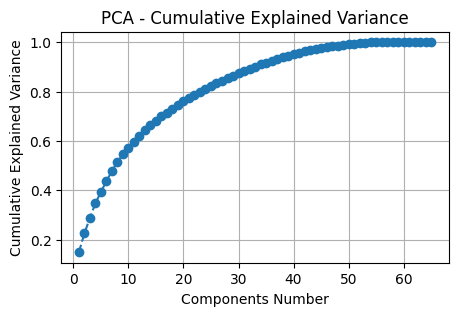

PC1: 0.149, cumulative: 0.149
PC2: 0.076, cumulative: 0.225
PC3: 0.063, cumulative: 0.288
PC4: 0.060, cumulative: 0.347
PC5: 0.046, cumulative: 0.393
PC6: 0.044, cumulative: 0.437
PC7: 0.041, cumulative: 0.478
PC8: 0.038, cumulative: 0.515
PC9: 0.030, cumulative: 0.545
PC10: 0.027, cumulative: 0.572
PC11: 0.025, cumulative: 0.597
PC12: 0.023, cumulative: 0.620
PC13: 0.023, cumulative: 0.643
PC14: 0.020, cumulative: 0.663
PC15: 0.019, cumulative: 0.682
PC16: 0.017, cumulative: 0.699
PC17: 0.016, cumulative: 0.715
PC18: 0.016, cumulative: 0.731
PC19: 0.015, cumulative: 0.746
PC20: 0.014, cumulative: 0.760
PC21: 0.013, cumulative: 0.773
PC22: 0.013, cumulative: 0.787
PC23: 0.012, cumulative: 0.799
PC24: 0.012, cumulative: 0.811
PC25: 0.012, cumulative: 0.823
PC26: 0.011, cumulative: 0.834
PC27: 0.011, cumulative: 0.844
PC28: 0.010, cumulative: 0.855
PC29: 0.010, cumulative: 0.864
PC30: 0.010, cumulative: 0.874
PC31: 0.009, cumulative: 0.883
PC32: 0.009, cumulative: 0.893
PC33: 0.009, cumu

In [2]:
dfc=player_merged.copy()
nemeric_cols=[
    'CenterControlScore', 'PieceActivityScore', 'KingSafetyScore',
       'CastlingScore', 'KingTropismScore', 'KingDefendersScore',
       'KingPawnShieldScore', 'KingZoneControlScore',
       'KingDiagonalExposureScore', 'KingEscapeSquaresScore', 'CaptureRatio',
       'PawnCenter', 'AveragePawnAdvanceDepth', 'CheckRatio', 'ForceRatio',
       'PawnIsolateScore', 'PawnOverlapScore', 'PawnProtectScore',
       'queen_1LifeRatio', 'rook_1LifeRatio', 'rook_2LifeRatio',
       'bishop_1LifeRatio', 'bishop_2LifeRatio', 'knight_1LifeRatio',
       'knight_2LifeRatio', 'pawn_1LifeRatio', 'pawn_2LifeRatio',
       'pawn_3LifeRatio', 'pawn_4LifeRatio', 'pawn_5LifeRatio',
       'pawn_6LifeRatio', 'pawn_7LifeRatio', 'pawn_8LifeRatio',
       'queen_promo_1LifeRatio', 'queen_promo_2LifeRatio',
       'queen_promo_3LifeRatio', 'queen_promo_4LifeRatio',
       'queen_promo_5LifeRatio', 'queen_promo_6LifeRatio',
       'queen_promo_7LifeRatio', 'queen_promo_8LifeRatio',
       'rook_promo_1LifeRatio', 'rook_promo_2LifeRatio',
       'rook_promo_3LifeRatio', 'rook_promo_4LifeRatio',
       'rook_promo_5LifeRatio', 'rook_promo_6LifeRatio',
       'rook_promo_7LifeRatio', 'rook_promo_8LifeRatio',
       'bishop_promo_1LifeRatio', 'bishop_promo_2LifeRatio',
       'bishop_promo_3LifeRatio', 'bishop_promo_4LifeRatio',
       'bishop_promo_5LifeRatio', 'bishop_promo_6LifeRatio',
       'bishop_promo_7LifeRatio', 'bishop_promo_8LifeRatio',
       'knight_promo_1LifeRatio', 'knight_promo_2LifeRatio',
       'knight_promo_3LifeRatio', 'knight_promo_4LifeRatio',
       'knight_promo_5LifeRatio', 'knight_promo_6LifeRatio',
       'knight_promo_7LifeRatio', 'knight_promo_8LifeRatio']
X = dfc[nemeric_cols].fillna(0)
X_scaled = StandardScaler().fit_transform(X)
pca = PCA().fit(X_scaled)
explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(5,3))
plt.plot(range(1, len(explained_var)+1),
         explained_var.cumsum(),
         marker="o", linestyle="--")
plt.xlabel("Components Number")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()
for i, var in enumerate(explained_var, start=1):
    print(f"PC{i}: {var:.3f}, cumulative: {explained_var[:i].sum():.3f}")

In [4]:
pca=PCA(n_components=42)
X_pca=pca.fit_transform(X_scaled)
player_coords=pd.DataFrame(
    X_pca,
    index=dfc.loc[X.index, "user"], 
    columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]
)
player_coords

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
user,,,,,,,,,,,,,,,,,,,,,
107degrees,0.921235,-0.255772,0.792136,0.066192,-0.078056,2.361253,-0.569303,-0.041741,-0.114114,0.723414,...,0.572701,0.065086,0.118396,-0.362039,0.514761,-0.606786,-0.222267,0.198822,-0.279873,-0.038201
190l,-4.477063,-0.624701,-0.280875,0.331982,-0.436503,0.912985,-0.509410,-0.042422,-0.860215,0.985559,...,-2.295395,-2.053414,-2.242877,1.069783,-1.819095,-1.000799,-1.589218,1.107286,0.613378,-0.040389
1b31-O,-4.208112,-0.464443,-2.111985,0.586297,-0.433985,1.894000,-0.543579,0.051891,0.388964,0.659239,...,0.009383,0.095127,0.491447,0.095354,-0.284649,0.280364,-1.008479,0.620625,-0.367765,-0.041436
1d51-0,-0.394543,-0.197460,-1.295584,0.392306,-0.121886,2.846189,-0.109536,-0.024158,0.839536,0.322049,...,-0.084739,0.685299,-0.363163,-0.009831,0.041791,0.275802,-0.009837,-0.074255,0.074878,0.017840
1e41-0,0.956790,-0.045155,1.550970,-0.256780,0.681820,2.540835,0.862107,-0.304323,-2.313155,-2.022893,...,-0.575746,1.188665,1.179396,0.040263,-0.136889,0.671661,-1.453755,1.225675,0.454578,-0.047683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ян Дьомін,-1.111901,-0.322569,0.277464,0.017099,0.177990,-0.833903,0.327317,0.008029,-0.132110,0.007238,...,0.113930,0.083932,0.101218,-0.141651,0.045195,0.160595,0.358431,-0.000590,-0.167776,0.023990
אהרן בגראטיוני,-0.359399,-0.383116,0.104113,0.113516,-0.565992,-0.863398,-1.074655,0.087738,0.303560,-0.061960,...,0.261134,-0.166958,-0.462883,-0.047497,-0.031874,-0.283759,0.140455,-0.158659,-0.230215,0.000581
مساعد المطيري,1.238367,-0.146319,-1.786319,0.361887,-0.943922,-0.892137,-2.296098,0.191708,-0.106868,0.819978,...,0.269688,0.848018,0.550630,0.338645,-0.353646,-1.108824,0.615939,-0.109680,1.918676,0.011266


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix=pd.DataFrame(
    cosine_similarity(player_coords),
    index=player_coords.index,
    columns=player_coords.index
)
similarity_matrix

user,107degrees,190l,1b31-O,1d51-0,1e41-0,1g41-0,2305,2400FM,2Tilted,2good4u734,...,Эдуардо Гербелли Нето,Эмир Шаршенбеков,Юрий Горячкин,Юрий Лобачёв,Яков Гинзбург,Ян Дьомін,אהרן בגראטיוני,مساعد المطيري,浩煊 张,꧁༺ɖǟɦǟʍɖɨ ֆǟռʊɖʊʟǟ༻꧂
user,,,,,,,,,,,,,,,,,,,,,
107degrees,1.000000,-0.027921,0.055680,0.398457,-0.007569,0.513423,0.126418,0.326248,0.342441,0.421829,...,-0.221810,-0.218469,-0.087795,-0.074414,-0.373857,-0.428395,-0.050884,-0.047791,-0.203321,0.276938
190l,-0.027921,1.000000,0.493865,0.176560,-0.139611,-0.097773,0.242256,-0.172558,0.048094,-0.235611,...,0.108931,0.069767,-0.159891,-0.615737,0.036222,0.217737,0.061326,-0.180212,0.305122,-0.203458
1b31-O,0.055680,0.493865,1.000000,0.518139,-0.070884,-0.094208,0.774074,-0.312778,0.348411,-0.027390,...,0.073253,0.161377,-0.092259,-0.396460,0.129294,0.124190,0.057654,-0.136043,0.615610,-0.432938
1d51-0,0.398457,0.176560,0.518139,1.000000,0.023922,0.140860,0.573813,0.171216,0.550403,0.256218,...,-0.383763,-0.357570,0.008586,-0.029464,-0.083112,-0.225116,-0.206654,0.161574,0.169928,-0.258144
1e41-0,-0.007569,-0.139611,-0.070884,0.023922,1.000000,0.662457,-0.039896,0.174316,0.359173,0.470153,...,-0.036796,-0.095584,-0.132891,0.200101,0.313879,-0.127641,-0.027151,-0.272068,-0.221730,-0.121435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ян Дьомін,-0.428395,0.217737,0.124190,-0.225116,-0.127641,-0.335896,-0.092722,-0.136417,-0.203718,-0.649734,...,0.166390,0.484423,-0.078229,-0.363169,0.247270,1.000000,0.012705,-0.113322,0.481663,-0.254464
אהרן בגראטיוני,-0.050884,0.061326,0.057654,-0.206654,-0.027151,0.035189,0.032113,0.104177,-0.302427,-0.046428,...,0.227710,0.399938,-0.100295,-0.070843,0.007678,0.012705,1.000000,0.155705,0.259314,0.173939
مساعد المطيري,-0.047791,-0.180212,-0.136043,0.161574,-0.272068,-0.214582,-0.134002,0.093665,-0.229902,-0.006415,...,0.159817,-0.052884,-0.053824,0.033238,-0.281076,-0.113322,0.155705,1.000000,0.105213,0.042215


Text(0.5, 1.0, 'Chess Player Cosine Similarity Distribution')

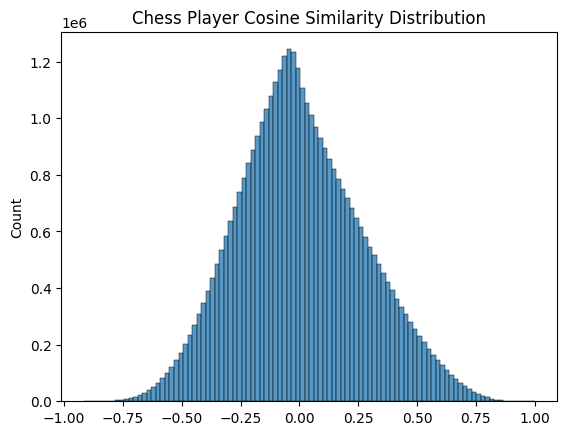

In [6]:
sns.histplot(similarity_matrix.values[np.triu_indices_from(similarity_matrix, k=1)], bins=100)
plt.title("Chess Player Cosine Similarity Distribution")

In [7]:
sim_values=similarity_matrix.values
players=similarity_matrix.index
pairs=[]

for i in range(len(players)):
    for j in range(i+1, len(players)):
        pairs.append((players[i], players[j], sim_values[i, j]))

similar_pairs=pd.DataFrame(pairs, columns=["PlayerA", "PlayerB", "Similarity"])
similar_pairs_sorted=similar_pairs.sort_values("Similarity", ascending=False)

similar_pairs_sorted.head(20)

,PlayerA,PlayerB,Similarity
36782401,SNCSolidGuy,brooklyncyclone,1.0
22080357,Gunter Deleyn,Iuri Shkuro,1.0
22080588,Gunter Deleyn,Jawhar Ben Fredj,1.0
5223766,AmericanPatzer3,brooklyncyclone,1.0
27738097,Kaimar Puusepp,brooklyncyclone,1.0
13513240,Coldplace,Denrick Cabral José Jorge,1.0
16024164,Denrick Cabral José Jorge,brooklyncyclone,1.0
22083746,Gunter Deleyn,SNCSolidGuy,1.0
27524887,Justin Parsons,brooklyncyclone,1.0
27523302,Justin Parsons,SNCSolidGuy,1.0


In [8]:
from difflib import get_close_matches
pairs_to_check = [
    ("Anish Giri", "Wesley So"),                #顶尖策略型
    ("Hikaru Nakamura", "Alireza Firouzja"),   #攻击型快棋
    ("Magnus Carlsen","Hikaru Nakamura")
]


def find_closest_name(name, all_names):
    match = get_close_matches(name, all_names, n=1, cutoff=0.6)
    return match[0] if match else None

def check_similarity(a, b, similarity_matrix, top_n=10):
    all_names = similarity_matrix.index.tolist()
    
    if a not in all_names:
        a_match = find_closest_name(a, all_names)
        print(f"{a} not found, closest match: {a_match}")
        a = a_match
    if b not in all_names:
        b_match = find_closest_name(b, all_names)
        print(f"{b} not found, closest match: {b_match}")
        b = b_match
    
    if a is None or b is None:
        print("Skipping due to unmatched name.")
        return

    sims = similarity_matrix.loc[a].sort_values(ascending=False)
    sim_ab = similarity_matrix.loc[a, b]
    rank = np.where(sims.index == b)[0][0] + 1

    print("="*60) 
    print(f"\nPlayer {a} vs {b}")
    print(f"Similarity: {sim_ab:.3f}")
    print(f"{b}'s similarity rank in {a}'s list: {rank} / {len(sims)}")
    print(f"Top {top_n} most similar players to {a}:")
    print(sims.head(top_n))
    print("="*60 + "\n")  

for a, b in pairs_to_check:
    check_similarity(a, b, similarity_matrix, top_n=20)


Player Anish Giri vs Wesley So
Similarity: 0.025
Wesley So's similarity rank in Anish Giri's list: 2917 / 8816
Top 20 most similar players to Anish Giri:
user
Anish Giri              1.000000
Daniil Dubov            0.922218
David Anton Guijarro    0.875256
Alex Goldin             0.873100
Bogdan Daniel Deac      0.871973
Alexandr Predke         0.871769
Alexander Grischuk      0.866693
Alexander Zubov         0.864794
Alberto Barp            0.862560
Azer Mirzoev            0.858506
Alexey Dreev            0.854238
Alexey Reshetnikov      0.844557
Bilel Bellahcene        0.827434
Ansh Shah               0.826699
Alexander Donchenko     0.825439
Brandon Jacobson        0.821563
Ciorgovean Iustin       0.818219
Arsene Kukhmazov        0.816166
Chenxuan Ling           0.814295
Anton Isajevsky         0.812071
Name: Anish Giri, dtype: float64


Player Hikaru Nakamura vs Alireza Firouzja
Similarity: 0.056
Alireza Firouzja's similarity rank in Hikaru Nakamura's list: 350 / 8816
Top 20 most

In [8]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=nemeric_cols,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)
for pc in loadings.columns:  #
    top_features = loadings[pc].abs().sort_values(ascending=False).head(5)
    print(f"\n{pc} 风格轴最重要的特征:")
    print(top_features)


PC1 风格轴最重要的特征:
KingDiagonalExposureScore    0.287349
AveragePawnAdvanceDepth      0.281867
KingEscapeSquaresScore       0.251051
KingSafetyScore              0.244805
queen_1LifeRatio             0.225165
Name: PC1, dtype: float64

PC2 风格轴最重要的特征:
rook_promo_3LifeRatio    0.345200
rook_promo_2LifeRatio    0.342099
rook_promo_1LifeRatio    0.311216
rook_promo_4LifeRatio    0.278133
rook_promo_5LifeRatio    0.273371
Name: PC2, dtype: float64

PC3 风格轴最重要的特征:
PieceActivityScore    0.473599
CenterControlScore    0.466393
KingDefendersScore    0.380657
CaptureRatio          0.265295
PawnCenter            0.254983
Name: PC3, dtype: float64

PC4 风格轴最重要的特征:
rook_promo_5LifeRatio      0.352083
rook_promo_4LifeRatio      0.348542
knight_promo_3LifeRatio    0.304666
rook_promo_3LifeRatio      0.294892
knight_promo_4LifeRatio    0.293817
Name: PC4, dtype: float64

PC5 风格轴最重要的特征:
queen_promo_5LifeRatio    0.498614
queen_promo_4LifeRatio    0.483089
queen_promo_6LifeRatio    0.411853
queen_promo_3Lif

#  hierarchical clustering

In [9]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

converted cosine similarities to distances as   
distance = 1 - similarity

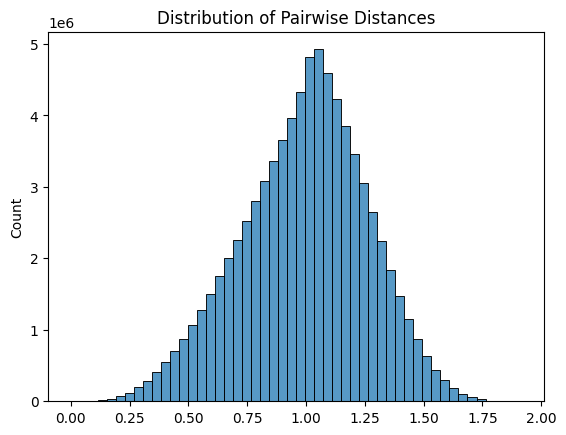

user,107degrees,190l,1b31-O,1d51-0,1e41-0,1g41-0,2305,2400FM,2Tilted,2good4u734,...,Эдуардо Гербелли Нето,Эмир Шаршенбеков,Юрий Горячкин,Юрий Лобачёв,Яков Гинзбург,Ян Дьомін,אהרן בגראטיוני,مساعد المطيري,浩煊 张,꧁༺ɖǟɦǟʍɖɨ ֆǟռʊɖʊʟǟ༻꧂
user,,,,,,,,,,,,,,,,,,,,,
107degrees,2.220446e-16,1.027921e+00,9.443199e-01,6.015426e-01,1.007569,0.486577,0.873582,0.673752,0.657559,0.578171,...,1.221810,1.218469,1.087795,1.074414,1.373857,1.428395e+00,1.050884e+00,1.047791e+00,1.203321e+00,7.230624e-01
190l,1.027921e+00,4.440892e-16,5.061345e-01,8.234404e-01,1.139611,1.097773,0.757744,1.172558,0.951906,1.235611,...,0.891069,0.930233,1.159891,1.615737,0.963778,7.822632e-01,9.386743e-01,1.180212e+00,6.948781e-01,1.203458e+00
1b31-O,9.443199e-01,5.061345e-01,-2.220446e-16,4.818615e-01,1.070884,1.094208,0.225926,1.312778,0.651589,1.027390,...,0.926747,0.838623,1.092259,1.396460,0.870706,8.758101e-01,9.423457e-01,1.136043e+00,3.843902e-01,1.432938e+00
1d51-0,6.015426e-01,8.234404e-01,4.818615e-01,2.220446e-16,0.976078,0.859140,0.426187,0.828784,0.449597,0.743782,...,1.383763,1.357570,0.991414,1.029464,1.083112,1.225116e+00,1.206654e+00,8.384262e-01,8.300721e-01,1.258144e+00
1e41-0,1.007569e+00,1.139611e+00,1.070884e+00,9.760776e-01,0.000000,0.337543,1.039896,0.825684,0.640827,0.529847,...,1.036796,1.095584,1.132891,0.799899,0.686121,1.127641e+00,1.027151e+00,1.272068e+00,1.221730e+00,1.121435e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ян Дьомін,1.428395e+00,7.822632e-01,8.758101e-01,1.225116e+00,1.127641,1.335896,1.092722,1.136417,1.203718,1.649734,...,0.833610,0.515577,1.078229,1.363169,0.752730,2.220446e-16,9.872947e-01,1.113322e+00,5.183373e-01,1.254464e+00
אהרן בגראטיוני,1.050884e+00,9.386743e-01,9.423457e-01,1.206654e+00,1.027151,0.964811,0.967887,0.895823,1.302427,1.046428,...,0.772290,0.600062,1.100295,1.070843,0.992322,9.872947e-01,2.220446e-16,8.442951e-01,7.406862e-01,8.260606e-01
مساعد المطيري,1.047791e+00,1.180212e+00,1.136043e+00,8.384262e-01,1.272068,1.214582,1.134002,0.906335,1.229902,1.006415,...,0.840183,1.052884,1.053824,0.966762,1.281076,1.113322e+00,8.442951e-01,-2.220446e-16,8.947870e-01,9.577851e-01


In [10]:
def cosine_to_distance(similarity_matrix):
    return 1-similarity_matrix
distance_matrix=cosine_to_distance(similarity_matrix)
sns.histplot(distance_matrix.values.flatten(), bins=50)
plt.title("Distribution of Pairwise Distances")
plt.show()
distance_matrix

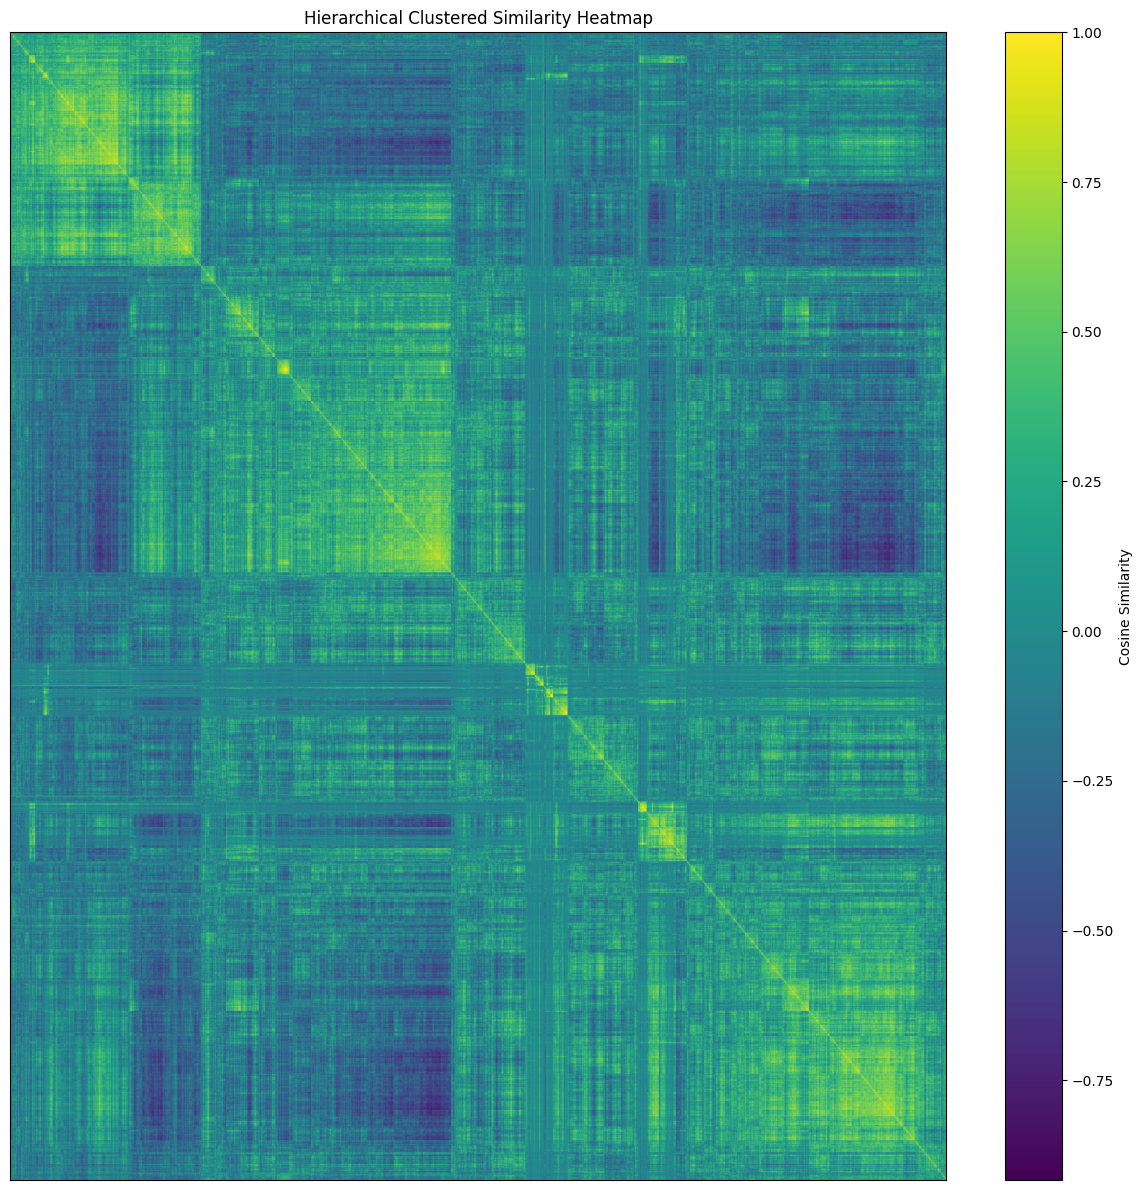

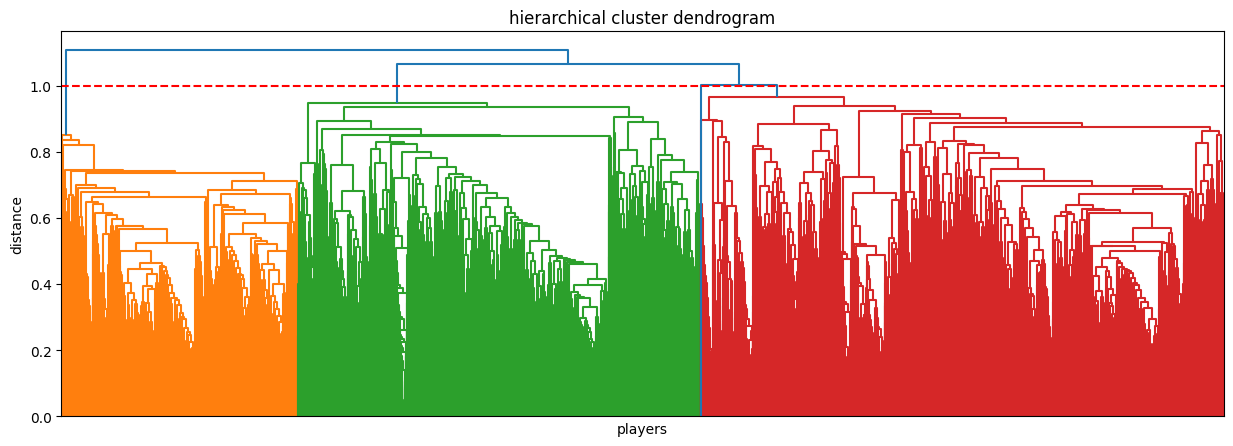

                   Player  Cluster
10           4empechement        1
9              2good4u734        1
8                 2Tilted        1
7                  2400FM        1
6                    2305        1
...                   ...      ...
19            Aadya Gowda        3
8814                 浩煊 张        3
205           Aja Sampath        3
4860         Marcus Zheng        3
4735  Mahdi Gholami Orimi        4

[8816 rows x 2 columns]


In [11]:
def hierarchical_cluster(similarity_matrix,method='average',threshold=1.0):
    distance_matrix=cosine_to_distance(similarity_matrix)
    np.fill_diagonal(distance_matrix.values,0)
    condenwosed_distance=squareform(distance_matrix.values)
    Z=sch.linkage(condenwosed_distance,method=method) #average/complete
    #画热力图要用到的新排序
    order=sch.leaves_list(Z)
    reordered_similarity = similarity_matrix.iloc[order, :].iloc[:, order]
    #heatmap
    plt.figure(figsize=(12,12))
    plt.imshow(reordered_similarity, cmap='viridis', aspect='auto')
    plt.colorbar(label='Cosine Similarity')
    plt.title('Hierarchical Clustered Similarity Heatmap')
    #plt.xticks(range(len(order)), reordered_similarity.columns, rotation=90)
    #plt.yticks(range(len(order)), reordered_similarity.index)
    plt.xticks([])  
    plt.yticks([])
    plt.tight_layout()
    plt.savefig("cluster_heatmap.png", dpi=150)
    plt.show()
    #dendrogram
    plt.figure(figsize=(15,5))
    sch.dendrogram(Z,labels=similarity_matrix.index.tolist(),orientation='top',color_threshold=threshold)
    plt.axhline(y=threshold, color='r', linestyle='--') #cutline
    plt.title('hierarchical cluster dendrogram')
    plt.xlabel('players')
    plt.ylabel('distance')
    plt.xticks([])
    plt.show()

    clusters=sch.fcluster(Z, threshold, criterion='distance')
    return clusters, Z
clusters,Z=hierarchical_cluster(similarity_matrix, method='average', threshold=1.0)
print(pd.DataFrame({'Player': similarity_matrix.index, 'Cluster': clusters}).sort_values(by='Cluster'))

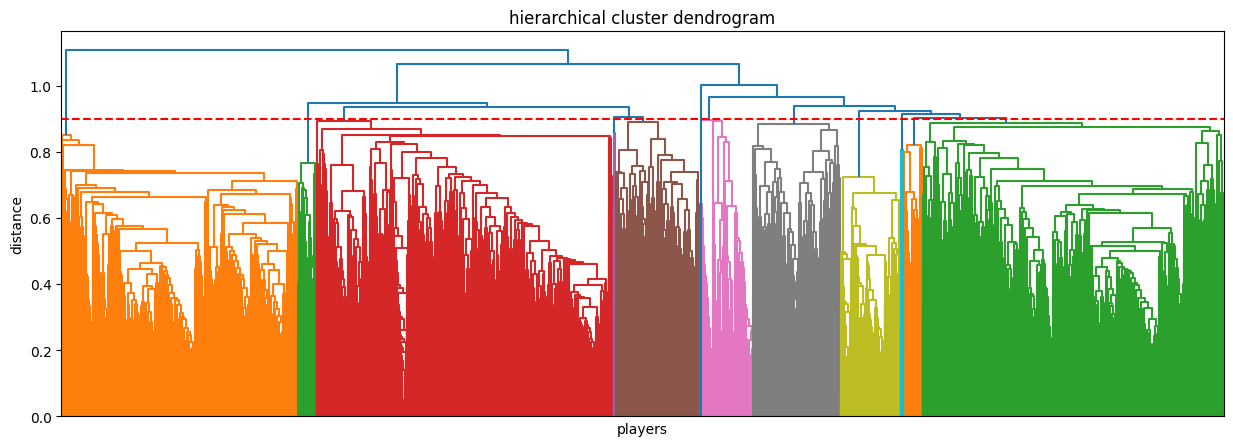

Threshold 0.9: 12 clusters


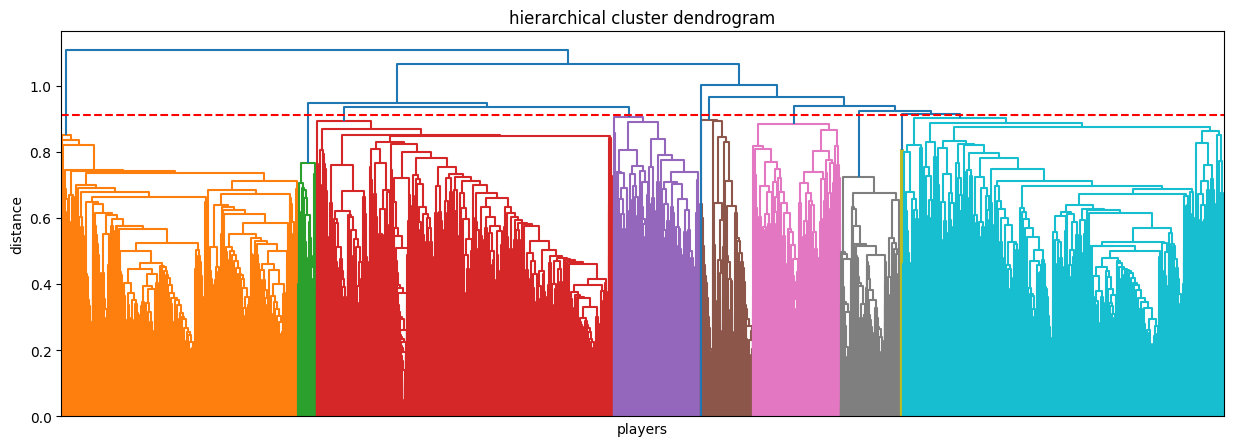

Threshold 0.91: 10 clusters


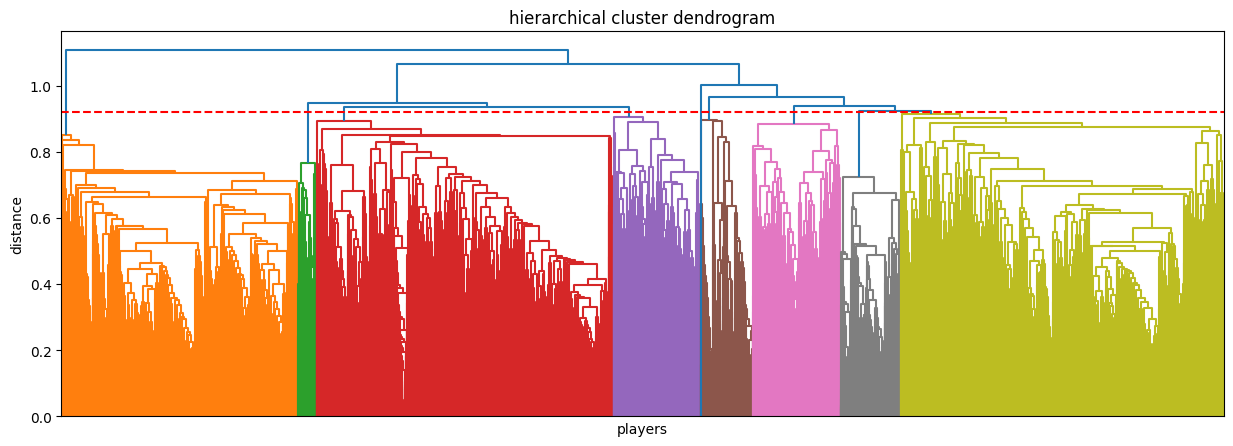

Threshold 0.92: 9 clusters


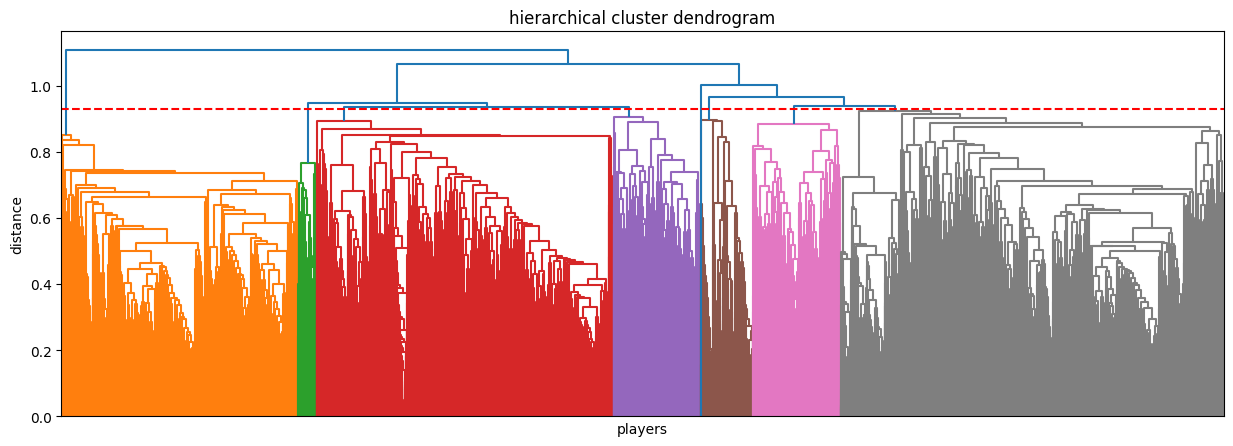

Threshold 0.93: 8 clusters


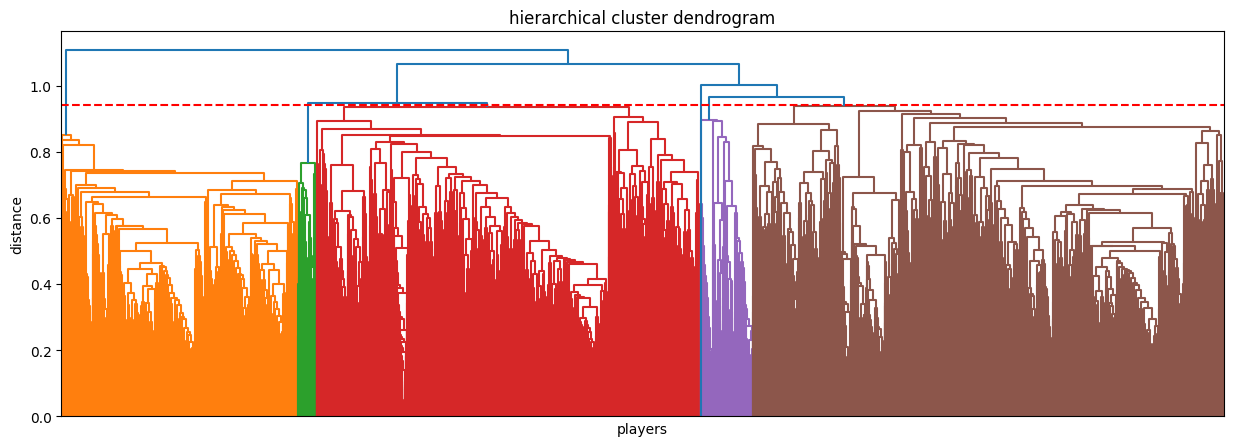

Threshold 0.94: 6 clusters


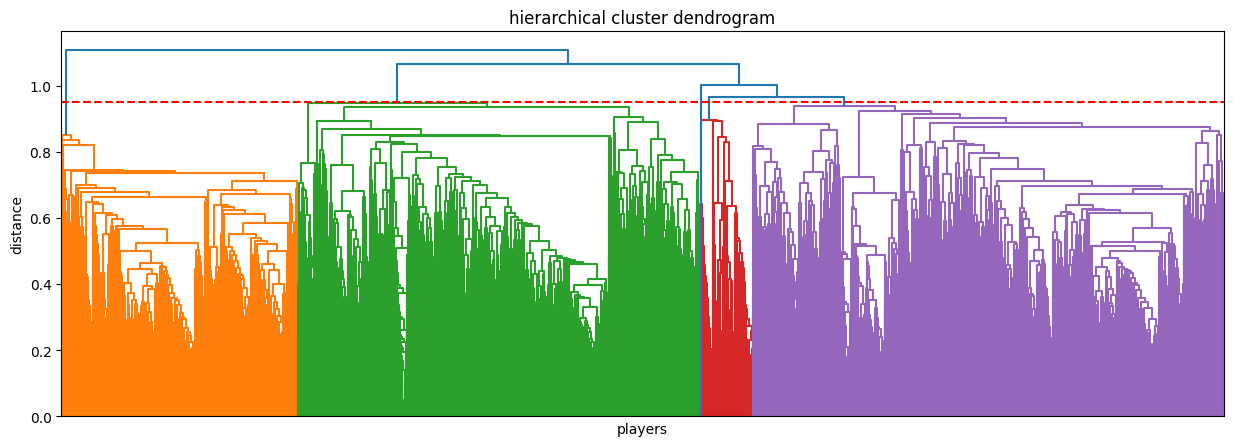

Threshold 0.95: 5 clusters


In [12]:
def hierarchical_cluster_noheat(similarity_matrix,method='average',threshold=1.0):
    distance_matrix=cosine_to_distance(similarity_matrix)
    np.fill_diagonal(distance_matrix.values,0)
    condenwosed_distance=squareform(distance_matrix.values)
    Z=sch.linkage(condenwosed_distance,method=method) #average/complete
    #画热力图要用到的新排序
    order=sch.leaves_list(Z)
    reordered_similarity = similarity_matrix.iloc[order, :].iloc[:, order]
    #heatmap
    #plt.figure(figsize=(12,12))
    #plt.imshow(reordered_similarity, cmap='viridis', aspect='auto')
    # plt.colorbar(label='Cosine Similarity')
    # plt.title('Hierarchical Clustered Similarity Heatmap')
    #plt.xticks(range(len(order)), reordered_similarity.columns, rotation=90)
    #plt.yticks(range(len(order)), reordered_similarity.index)
    # plt.xticks([])  
    # plt.yticks([])
    # plt.tight_layout()
    # plt.savefig("cluster_heatmap.png", dpi=150)
    # plt.show()

    #dendrogram
    plt.figure(figsize=(15,5))
    sch.dendrogram(Z,labels=similarity_matrix.index.tolist(),orientation='top',color_threshold=threshold)
    plt.axhline(y=threshold, color='r', linestyle='--') #cutline
    plt.title('hierarchical cluster dendrogram')
    plt.xlabel('players')
    plt.ylabel('distance')
    plt.xticks([])
    plt.show()

    clusters=sch.fcluster(Z, threshold, criterion='distance')
    return clusters, Z
for t in [0.9,0.91,0.92,0.93,0.94,0.95]:
    clusters, Z = hierarchical_cluster_noheat(similarity_matrix, method='average', threshold=t)
    print(f"Threshold {t}: {len(set(clusters))} clusters")